Capstone Project
Danny Clifford
December 31st, 2050


# I. Definition

### Project Overview

With much better memory than people and the amount of personal information we share with computers, it's amazing they don't appear to understand our personalities better.  With the exceptions of saving searches and some companies using AI and machine learning to predict profitability for advertisements, there is little effort to understand personal tendencies to cater content for (and not just to) individuals. Even those multibillion dollar corporations aim to maximize advertisment profit, not to understand the fundamental features that make each of us unique.  

Understanding what connects us all, what makes each of us unique, what are our strengths and how can we harness everyone's strengths to build better lives for individuals and humanity, seem's far from the focus of their efforts.  For the first time in history, we are able to economically collect and process enough information to understand the patterns of human nature.  There have been good attempts in recent history of distinguishing the features of human processing that make certain people different than others, most notably Carl Jung in his book Psychological Types and the subsequent adaptation of his theories to the Myers Briggs Personality Index.  

Carl Jung notes that it is difficult for a person who experiences their own bias to accurately judge others, joking that one person creating a system would be like creating a Universal Church with one member.  Luckily, since his time wonderful scientists such as Alan Turing, John von Neumann, J.C.R. Licklider, Miller, Moore, Noyce, and countless other have made it incredibly easy to collect, share, and calculate data from around the world almost instantly, not to mention make impressive improvements on models of understanding how agents behave.  With the addition of breakthroughs in behavioral psychology by greats like Kahnemann, Tversky, and Thaler, we are quickly building the ability to study the patterns of reason and thought in humans as differentiated by the rational agents which traditional economic theory implies.

Putting these pieces together, as we communicate with computers and people, we are creating valuable information and patterns that, if only captured and studied, would give great insight into how our individual and collective minds work.  This project is about helping computers understand how the patterns in our language reflect our inner personality and in turn how we recieve, process, and communicate information.  Ultimately, computers can be our tools to help us learn our unique patterns and to help us change, supplement, or leverage how we do things to help us achieve our goals.

### Problem Statement
    
The problem that I am setting out to solve is how to understand someone's personality based on their use of language.  If we can accurately predict one of the most fundamental aspects of a person’s behavior and uniqueness based off the language they use, the ability to communicate information to that person will be drastically improved.  The internet is designed based on information that is already programmed into the web page itself; for example, administrators see a website much differently as a new customer or even a logged in user and are determined prior to visiting the webpage. This poses a difficult design problem for web designers to incorporate designs that maximize the profit or usefulness to their intended audience rather than communicating information or value to a person on an individual basis.  If we can predict learning style or how an individual will react to their environment, then we can better customize the learning experience to their preference. 
    
Quantifying personality has been done for us with the Myers Brigg Personality Index 4 letter code. These will be further broken down into their 4 features of a single letter with only 2 options, making it a binary choice and easy to encode the data.  In addition, it will also allow us to train the weights of determining individual features of personality in a more focused way. NLP allows algorithms to extract meaning from text whether from word count, frequency, and even parts of speech in a quantifiable and measurable way. These matrices of language data will be learned by a Neural Network and these patterns during training will be used to predict the personality features of the test group.  

1. Download the data from Kaggle
2. Let SpaCy web-medium run through the posts to make word vectors
3. Shuffle-Split the data into testing validation and training data.
4. Run benchmarks training and testing with Logistic Regression, Random Forest, and MLP Classifiers
5. Run training and validation through the CNN
5. Test accuracy of the model on the test set with AUC
    
    
### Metrics

Training a neural network on language use and their corresponding personality feature labels allows us to measure the AUC.  Area under the ROC curve is used to ensure the proper binary classification when it comes to specificity and sensitivity. This will help better quantify individual differences in each of the 4 personality features. Wang uses AUC in order to quantify and measure accuracy of a model.  Since the distribution of personalities within the dataset is skewed in both our datasets, this will be a good evaluation metric to use.  He also measured accuracy by comparing different models based on the features mentioned above based on AUC, not only breaking them down into dichotomous features (Sensing and Intuitive, Extrovert and Introvert), but also by focusing on features of the language.  His best individual feature was average word vectors with an AUC of 0.651, which represents this model’s ability to predict all 4 of the dichotomous personality traits.
    

# II. Analysis

### Data Exploration

The dataset is taken from Kaggle and contains 8,600 users with 50 recent comments on the Kaggle website each and their corresponding personality type.  This was user generated data from the Kaggle website and offers the most labeled personality data connected to their text data (comments) of what I could find online. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the excel document with the results
# save it as a panda's dataframe and call it data
data = pd.read_csv('raw/mbti_1.csv')

# print out a summary of the first 5 people to make sure it worked
print(data.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


This is the first 5 entries of the Kaggle dataset. It comes with a 4 letter code called 'type' which is the person's peronality archetype according to their test results from the Myers Briggs Personality Index. Under 'posts' is a string of their most recent 50 posts on Kaggle.com separated by |||. 

Below is a look at the first person's entire corpus of text that we can learn from in raw form. In Data Preprocessing we will remove the links and ||| along with creating a bag of words that a the person uses that we can compare to other people and personality types.

In [4]:
print(data.iloc[0]['posts'][:2000])

'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

Bag of Words is a way to see how likely people are to use a word or phrase.  In Natural Language Processing (NLP), the likelihood of a word being used can be determined by how often people use the word. The likelihood of a person using a word is therefore in part determined by the similarity to the people who use the word multiplied by the likelihood of the word being said by anyone. If a person is extroverted and extroverts say a word 1% of the time and introverts 0.1% of the time; if that word is said then it is 10x more likely that it came from an extrovert.

Using spaCy, 

Explain POS tagging

Explain Weighted Average Word Vectors

### Exploratory Visualization

The bar graph below shows the distribution of the personality types in the Kaggle database. 

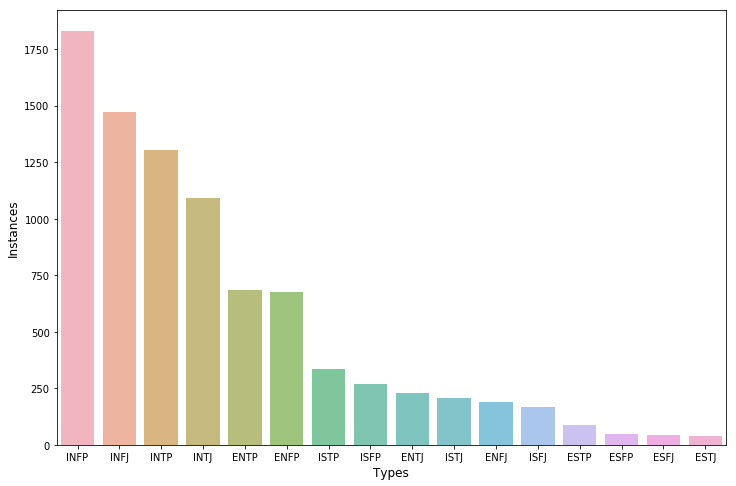

In [5]:
d = data['type'].value_counts()
k = data['type'].value_counts().keys()

plt.figure(figsize=(12,8))
sns.barplot(d.index, d.values, alpha=0.7)
plt.ylabel('Instances', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

Clearly Introverted and/ or iNtuitive people dominate the Kaggle forums, or at least the ones participating in the creation of the database.  This will make it quite difficult to learn about those who are extroverted and sensing types (ESxx).  The model would likel minimize error by simply never predicting ESxx labels.

In [6]:
#distribution = {}
#actual_series = {}

l = float(len(data))
actual = [0.044, 0.015, 0.033, 0.021, 0.032, 0.081, 0.054, 0.088, 0.018, 0.116, 0.025, 0.138, 0.043, 0.085, 0.123, 0.087]
kaggle = []

for i in range(len(d)):
    kaggle.append(float(d[i]) / l)

keys = d.index.get_values()
values = d.get_values()


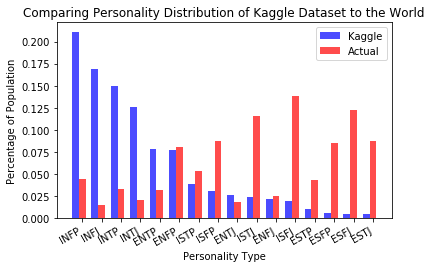

In [7]:
from matplotlib import style 

fig, ax = plt.subplots(1) 
fig.autofmt_xdate()
index = np.arange(16)
bar_width = 7
opacity = 0.7

kaggle_bar = plt.bar(index*20, kaggle, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Kaggle')
actual_bar = plt.bar(index*20 + bar_width, actual, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Actual')

plt.xlabel('Personality Type')
plt.ylabel('Percentage of Population')
plt.title('Comparing Personality Distribution of Kaggle Dataset to the World')
plt.xticks(index*20 + bar_width, keys)
plt.legend()
plt.show()



The bar graph above compares the percentage of people who belong to each type on the Kaggle database and Myers-Briggs world estimates.  If the data weren't already skewed enough, the people's personalities of this dataset are quite different to the general population.  When it comes to creating a system for understanding personality, the data used to train the model would ideally represent the population of personalities it is trying to understand.

Insert Facets

### Algorithms and Techniques

Preprocessing the data will be the largest part of the technique for predicting the personality of a person based on their text.  There are separating characters (|||) that need to be removed, links that will not show up in language and instead will be converted simply into the word 'link'.  

As mentioned in the Data Exploration section above, using the bag of words technique to create word vectors of each personality type's language. Using spaCy's medium web language library to create relative frequencies of common language used online, the result will be a model of language use specific to each personality feature.  In addition, spaCy can find the similarities of new sentences to each corresponding personality and even between personalities.  

The classifier is a Convolutional Neural Network, that will run over the language and assign the probability for each class based on their word vector representations and similarities to each personality type.

Since the data is quite skewed not only from the population but especially not distributed evenly throughout the personality types, creating a model that will most accurately predict the personality type will likely result in simply guessing the most likely personality features, in this case Introverted and Intuitive (IN).  Tuning the model based on the AUC and series of 4 binary classifications (which coincidentally also makes more sense in the study of personality) allows to create the most potentially useful prediction model and avoid overfitting.  

Calculating AUC not only tries to get the most predictions right, but tries to ensure that false positives and false negatives don't crop up.  In other words, since the accuracy metric would tend to create a prediction where everyone is IN__, the AUC metric will catch that the model systematically falsely assigns Extroverts the Introvert label and will look for patterns to help correct it.

### Benchmark

The Benchmark I will be using to predict personality based on the data is a Logistic Regression Algoirthm with 10 fold cross validation, as I am trying to make a similar model to Yilun Wang's in his Understanding Personality through Social Media.





# III. Methodology

### Data Preprocessing

(Just upload it from below, this takes a while)

In [8]:
# Split the data at |||
for i in range(len(data.posts)):
    posts = data.posts[i]
    data.posts[i] = posts.split('|||')
    
print(data.head())

   type                                              posts
0  INFJ  ['http://www.youtube.com/watch?v=qsXHcwe3krw, ...
1  ENTP  ['I'm finding the lack of me in these posts ve...
2  INTP  ['Good one  _____   https://www.youtube.com/wa...
3  INTJ  ['Dear INTP,   I enjoyed our conversation the ...
4  ENTJ  ['You're fired., That's another silly misconce...


In [9]:
import re
    
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
data['link_count'] = 0
df_links_list = []

for i in range(len(data['posts'])):
    cumulative_count = 0
    for j in range(len(data.posts[i])): 
        data.posts[i][j], count = pattern.subn('link', data.posts[i][j])
       # df_links_list.append(count)
        cumulative_count += count
        
    data['link_count'][i] = cumulative_count
            
print(data.head())
#print(len(df_links_list))

C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


   type                                              posts  link_count
0  INFJ  ['link, link, enfp and intj moments  link  spo...          24
1  ENTP  ['I'm finding the lack of me in these posts ve...           9
2  INTP  ['Good one  _____   link, Of course, to which ...           5
3  INTJ  ['Dear INTP,   I enjoyed our conversation the ...           2
4  ENTJ  ['You're fired., That's another silly misconce...           6


In [10]:
import spacy

nlp = spacy.load('en_core_web_md')

Preprocessing the data includes looping through each post from each person and separating them into their 50 statements at the |||. Then remove the links and keep count for data visualizations later. Take the MBTI type and break it into 0/1 for I/E, S/N, F/T, and J/P respectively so we can predict individual features and functions of personality.

In [11]:
word_vectors = []
vector_norms = []
data['e'] = 0
data['n'] = 0
data['t'] = 0
data['p'] = 0
    
for i in range(len(data.type)):
    persons_comments = ""
    if data.type[i][0] == 'E':
        data['e'][i] = 1
    if data.type[i][1] == 'N':
        data['n'][i] = 1
    if data.type[i][2] == 'T':
        data['t'][i] = 1
    if data.type[i][3] == 'P':
        data['p'][i] = 1
    for post in data.posts[i]:
        persons_comments += post + " "
    doc = nlp(persons_comments)
    word_vectors.append(doc.vector)
    vector_norms.append(doc.vector_norm)
    if i%1000 == 0:
        print(float(i)/8675.)

print(data.tail())

C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


0.0


C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda2\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.11527377521613832
0.23054755043227665
0.345821325648415
0.4610951008645533
0.5763688760806917
0.69164265129683
0.8069164265129684
0.9221902017291066
      type                                              posts  link_count  e  \
8670  ISFP  ['link, IxFP just because I always think of ca...           7  0   
8671  ENFP  ['So...if this thread already exists someplace...           2  1   
8672  INTP  ['So many questions when i do these things.  I...           2  0   
8673  INFP  ['I am very conflicted right now when it comes...           0  0   
8674  INFP  ['It has been too long since I have been on pe...           3  0   

      n  t  p  
8670  0  0  1  
8671  1  0  1  
8672  1  1  1  
8673  1  0  1  
8674  1  0  1  


Below I can't seem to figure out how to get higher dimensional vectors to be the same shape.

If not just get an entire vector representation of all the posts, which are an average of the tokens in the corpus. The shape of the doc.vector is (300,) which causes dimensionality problems. 

Tensors (doc.tensor) come in (x, 384) where x varies from roughly 600-1500.

In [106]:
high_dim_vectors = []

for i in range(10):
    persons_hd_vectors = []
    persons_comments = ""
    #    print(data.posts[i])
    #for post in data.posts[i]:
    #    print(post)
    #    persons_comments += post + " "
    print(data.posts[i][:100])
    doc = nlp(data.posts[i][:100])
    persons_hd_vectors.append(doc.tensor)
    print(persons_hd_vectors[].shape)

["'link", 'link', 'enfp and intj moments  link  sportscenter not top ten plays  link  pranks', 'What
(31, 384)
["'I'm finding the lack of me in these posts very alarming.", "Sex can be boring if it's in the same


IndexError: list index out of range

### Implementation

The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.





### Refinement

The process of improving upon the algorithms and techniques used is clearly documented. Both the initial and final solutions are reported, along with intermediate solutions, if necessary.





# Results

### Model Evaluation and Validation

The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.




### Justification

The final results are compared to the benchmark result or threshold with some type of statistical analysis. Justification is made as to whether the final model and solution is significant enough to have adequately solved the problem.

Although the final model performed much better than the benchmark, I would not say this solution adequately solves the problem of developing a tool to help understand people's personality through their language. 

In [12]:
data.to_csv('preprocessed_data.csv')

In [15]:
vectors_dict = { "vector"  : word_vectors,
            "vector_norm"  : vector_norms
               }

In [16]:
vect_df = pd.DataFrame.from_dict(vectors_dict)

In [18]:
vect_df.to_csv('spaCy_word_vectors.csv')

In [19]:
data = pd.read_csv('preprocessed_data.csv')
# These are the word vectors that represent the text from all the posts of one person, index's correspond with data.index
# Also vector_norms which are floats that I haven't been able to figure out how to use yet 
vect_df = pd.read_csv('spaCy_word_vectors.csv')

In [20]:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
#scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [110]:
# sometimes I don't do type. Instead, I'll predict data['t'] and calculate AUC, clearly IN are bias in this data set
X_train, X_test, y_train, y_test = train_test_split(word_vectors, data.type, test_size=0.25, random_state=42, shuffle=True)

In [111]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

In [112]:
#X_test_train, X_test_t, y_test_train, y_test_t = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)
#print(X_train.shape)
for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    #auc = metrics.auc(fpr, tpr)
    #print(auc)

LogisticRegression 0.3619179345320424
RandomForestClassifier 0.24343015214384509
MLPClassifier 0.47210696173351774


In [113]:
doc = nlp('Preprocessing the data will be the largest part of the technique for predicting the personality of a person based on their text. There are separating characters (|||) that need to be removed, links that will not show up in language and instead will be converted simply into the word link. As mentioned in the Data Exploration section above, using the bag of words technique to create word vectors of each personality types language. Using spaCys medium web language library to create relative frequencies of common language used online, the result will be a model of language use specific to each personality feature. In addition, spaCy can find the similarities of new sentences to each corresponding personality and even between personalities. This is a cool exploratory visualization for later. The classifier is a Convolutional Neural Network, that will run over the language and assign the probability for each class based on their word vector representations and similarities to each personality type. Since the data is quite skewed not only from the population but especially not distributed evenly throughout the personality types, creating a model that will most accurately predict the personality type will likely result in simply guessing the most likely personality features, in this case Introverted and Intuitive (IN). Tuning the model based on the AUC and series of 4 binary classifications (which coincidentally also makes more sense in the study of personality) allows to create the most potentially useful prediction model and avoid overfitting. Calculating AUC not only tries to get the most predictions right, but tries to ensure that false positives and false negatives don\'t crop up. In other words, since the accuracy metric would tend to create a prediction where everyone is IN__, the AUC metric will catch that the model systematically falsely assigns Extroverts the Introvert label and will look for patterns to help correct it.')
tester = doc.vector.reshape(1, -1)
prediction = nn_clf.predict(tester)
print(prediction)

['INTP']


I'm an ENTP and considering like 70+% of the data are introverted, pretty good guess.

In [114]:
import keras
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = X_train[2000:], X_train[:2000]
(y_train, y_valid) = y_train[2000:], y_train[:2000]

# print shape of training set
#print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print(x_valid.shape[0], 'validation samples')

ValueError: invalid literal for int() with base 10: 'ENFP'

In [119]:
from keras.layers import Embedding,LSTM
model3 = Sequential()
model3.add(Embedding(20000,300))  #Don't understand this part. What am I trying to input here?
model3.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model3.add(Dense(1,activation='sigmoid'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [107]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=16, kernel_size=2, activation ='relu', input_shape=(51, 300,1)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(16, activation='softmax')) #softmax #tanh

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 50, 299, 16)       80        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 149, 16)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 148, 32)       2080      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 73, 64)        8256      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 36, 64)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 36, 64)         0         
__________

In [108]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer = ModelCheckpoint(filepath='CNN.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation=(x_valid, y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

In [ ]:
# load the model weights that had the best validation score
model.load_weights('CNN.weights.best.hdf5')aaaa

In [75]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('\nTest accuracy: ', score[1])

NameError: name 'x_test' is not defined

Anything Bbelow is just code from me messing around too much and getting off task.

In [ ]:
EN_word_vector = []

extroverts = data.loc[data['e'] == 1]
introverts = data.loc[data['e'] == 0]

intuitive_introverts = introverts.loc[data['n'] == 1]
intuitive_extroverts = extroverts.loc[data['n'] == 1]

for i in intuitive_extroverts.index:
    persons_comments = ""
    for post in intuitive_extroverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    EN_word_vector.append(doc.vector)
    if i%500 == 0:
        print(i)
        
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(EN_word_vector, intuitive_extroverts['t'], test_size=0.25, random_state=42, shuffle=True)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    
    
IN_word_vector = []

for i in intuitive_introverts.index:
    persons_comments = ""
    for post in intuitive_introverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    IN_word_vector.append(doc.vector)
    if i%200 == 0:
        print(i)
        
X_train, X_test, y_train, y_test = train_test_split(IN_word_vector, intuitive_introverts['t'], test_size=0.25, random_state=42, shuffle=True)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    y_pred = clf.predict(E_word_vector)
    print(clf.__class__.__name__, accuracy_score(extroverts['t'], y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(extroverts['t'], y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    
    
E_word_vector = []
for i in extroverts.index:
    persons_comments = ""
    for post in extroverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    E_word_vector.append(doc.vector)
    if i%500 == 0:
        print(i)
        
y_pred = nn_clf.predict(E_word_vector)
print(clf.__class__.__name__, accuracy_score(extroverts['p'], y_pred))
fpr, tpr, thresholds = metrics.roc_curve(extroverts['p'], y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

# V. Conclusion

### Free Form Visualization

A visualization has been provided that emphasizes an important quality about the project with thorough discussion. Visual cues are clearly defined.

### Reflection

Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.


### Improvement

	
Discussion is made as to how one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.

In [ ]:
#X_test_train, X_test_t, y_test_train, y_test_t = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_train)    
    print(clf.__class__.__name__, accuracy_score(y_test_train, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test_train, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)

nn_clf_2 = MLPClassifier()
#train_np = np.array(X_test_train)
#print(len(train_np))
#guess = y_pred.tolist()

print(X_test_train[0])

array = y_pred.reshape(-1, 1)
df = pd.DataFrame ({
    'vector': np.array(X_test_train,dtype='float32'),
    'pred'  : array
})

#print(X_test_train[:2])
#trainer = zip(X_test_train, guess)
#xtestrain = np.ndarray(list(trainer))
#print(xtestrain)
nn_clf_2.fit(array, y_test_train)
y_pred_2 = nn_clf_2.predict(df)
print(clf.__class__.__name__, accuracy_score(y_test_t, y_pred_2))
fpr, tpr, thresholds = metrics.roc_curve(y_test_train, y_pred_2, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

In [ ]:
df_vector_list = []
df_label_list = []
df_vector_norm_list = []
df_post_list = []
df_index_list = []
e_list = []
n_list = []
t_list = [] 
p_list = []
word_vectors = []
vector_norms = []


for i in range(len(data.type)):
    # go through each person in the dataframe, with a fresh list of vectors for 
    #persons_comments = ""
    #list_of_vectors = []
    #list_of_vector_norms = []
    persons_comments = ""
    for post in data.posts[i]:
        
    label = [data.iloc[i]['e'], data.iloc[i]['n'], data.iloc[i]['t'], data.iloc[i]['p']]

    for post in data.posts[i]:
        #persons_comments += post + ". "
        persons_comments += post + " "

        doc = nlp(post)
        df_vector_list.append(doc.vector)
        df_vector_norm_list.append(doc.vector_norm)
        df_post_list.append(post)
        df_index_list.append(i)
        df_label_list.append(label)
        e_list.append(label[0])
        n_list.append(label[1])
        t_list.append(label[2]) 
        p_list.append(label[3])
    # after each post has been gone through but before the moving on to the next person
        # I want a list of vector norms to append to df vector norm list
        # I want a vector describing the whole corpus
    #vector.append(doc.vector)
    #print(vectors.dtype)
    #data['word_vectors'][i] = vectors
    doc = nlp(persons_comments)
    word_vectors.append(doc.vector)
    vector_norms.append(doc.vector_norm)
    if i%1000 == 0:
        print(float(i)/8675.)if i%500 == 0:
        print(i)

post_data = { 'user_id' :  df_index_list,
              'label'   :  df_label_list,
        'word_vector'   :  df_vector_list,
        'vector_norm'   :  df_vector_norm_list,
             'post'     :  df_post_list,
             'links'    :  df_links_list
             'e'        :  e_list,
             'n'        :  n_list,
             't'        :  t_list,
             'p'        :  p_list
            }
post_df = pd.DataFrame.from_dict(post_data)
print(post_df.head())